# #  ****Stock Market Analysis-Tech Stocks + Stock Prediction ****

In this project, we'll analyse data from the stock market for some technology stocks and esp.TESLA.

we'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

Here are the questions I try to answer:

* What was the change in a stock's price over time?
* What was the daily return average of a stock?
* What was the moving average of various stocks?
* What was the correlation between daily returns of different stocks?
* How much value do we put at risk by investing in a particular stock?
* How can we attempt to predict future stock behaviour?

In [1]:
#Python Data Analysis imports

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
import pandas_datareader.data as web

# For time stamps
from datetime import datetime



We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping

In [2]:
#We're going to analyse stock info for Microsoft,Apple,Amazon,Google,Facebook,Tesla and Netflix
tech_list = ['TSLA','MSFT','AAPL','AMZN','GOOGL','FB','NFLX']

In [3]:
#Setting the end date to today 
end = datetime.now()

#Start date set to 1 year back 
start = datetime(end.year-1,end.month,end.day)



In [4]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list: 
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

 Globals method, Tesla's stock data will be stored in the TSLA global variable dataframe. Let's see if that worked.

In [5]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
2020-01-09,99.760002,94.573997,99.419998,96.267998,142202000.0,96.267998
2020-01-10,96.987999,94.739998,96.358002,95.629997,64797500.0,95.629997


In [6]:
#Basic stats for Tesla's Stock
TSLA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,302.459894,285.696609,294.128665,295.102683,6.070205e+07,295.102683
std,175.166245,166.961050,171.011229,172.529139,4.639665e+07,172.529139
min,80.972000,70.101997,74.940002,72.244003,6.362400e+06,72.244003
25%,157.227997,144.945999,151.000000,150.778000,2.256210e+07,150.778000
50%,281.712006,262.268005,279.200012,274.316010,5.066500e+07,274.316010
75%,431.799988,411.600006,422.700012,421.940002,8.640680e+07,421.940002
max,744.489990,719.200012,723.659973,736.604980,3.046940e+08,736.604980


In [7]:

TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-06 to 2021-01-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [8]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name
company_list = [TSLA, MSFT, AAPL, AMZN, GOOGL, FB, NFLX]
company_name = ["TESLA", "MICROSOFT", "APPLE", "AMAZON", "GOOGLE", "FACEBOOK", "NETFLIX"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-12-21,532.619995,521.150024,530.049988,528.909973,3894000.0,528.909973,NETFLIX
2020-12-22,530.400024,520.500000,527.690002,527.330017,1906600.0,527.330017,NETFLIX
2020-12-23,526.320007,514.200012,524.760010,514.479980,2393200.0,514.479980,NETFLIX
2020-12-24,519.349976,512.210022,515.119995,513.969971,1144000.0,513.969971,NETFLIX
2020-12-28,523.659973,507.130005,516.429993,519.119995,2891900.0,519.119995,NETFLIX
2020-12-29,536.549988,515.479980,519.900024,530.869995,4022400.0,530.869995,NETFLIX
2020-12-30,533.260010,523.690002,530.130005,524.590027,1876300.0,524.590027,NETFLIX
2020-12-31,545.500000,523.150024,525.530029,540.729980,5388800.0,540.729980,NETFLIX
2021-01-04,540.799988,515.090027,539.000000,522.859985,4436100.0,522.859985,NETFLIX


Netflix nd chill is the best in overall growth in the last one year(dt-2021/01/02)*may_change_in_future  

# What's the change in stock's price over a year?

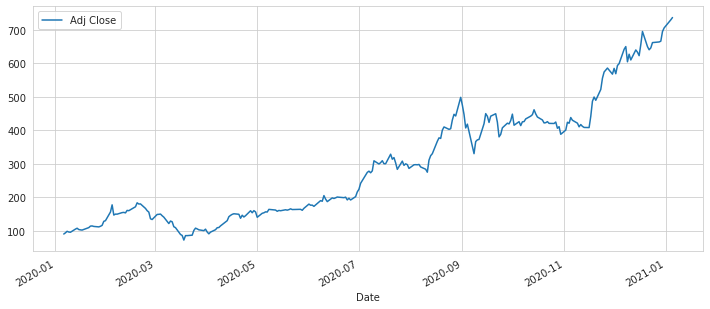

In [9]:
#Plotting the stock's adjusted closing price using pandas
TSLA['Adj Close'].plot(legend=True,figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

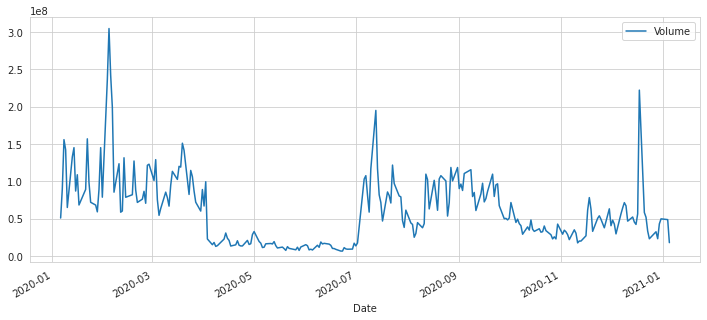

In [10]:
#Plotting the total volume being traded over time
TSLA['Volume'].plot(legend=True,figsize=(12,5))


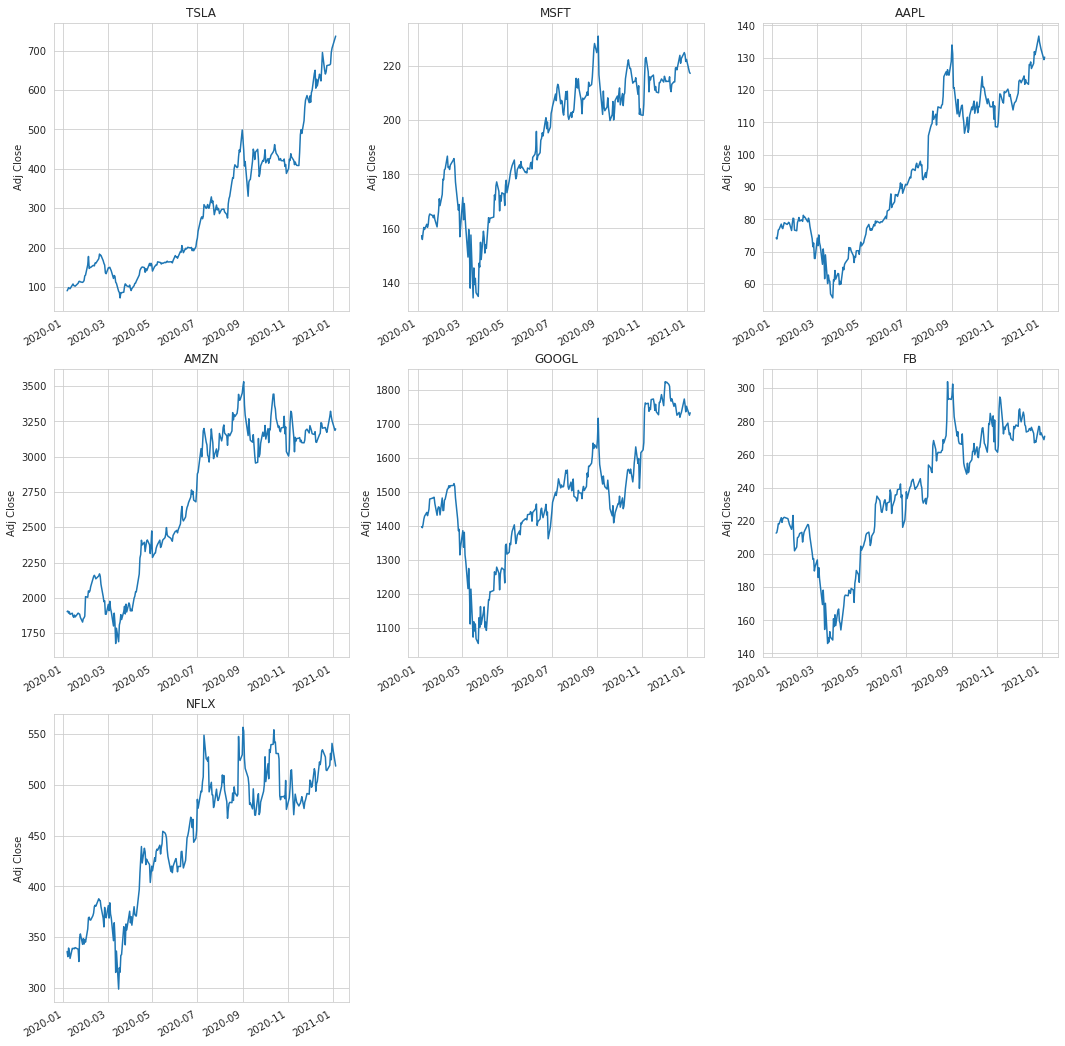

In [11]:
# Let's see a historical view of the closing price


plt.figure(figsize=(18, 8))
plt.subplots_adjust(top=1.9, bottom=1.8)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

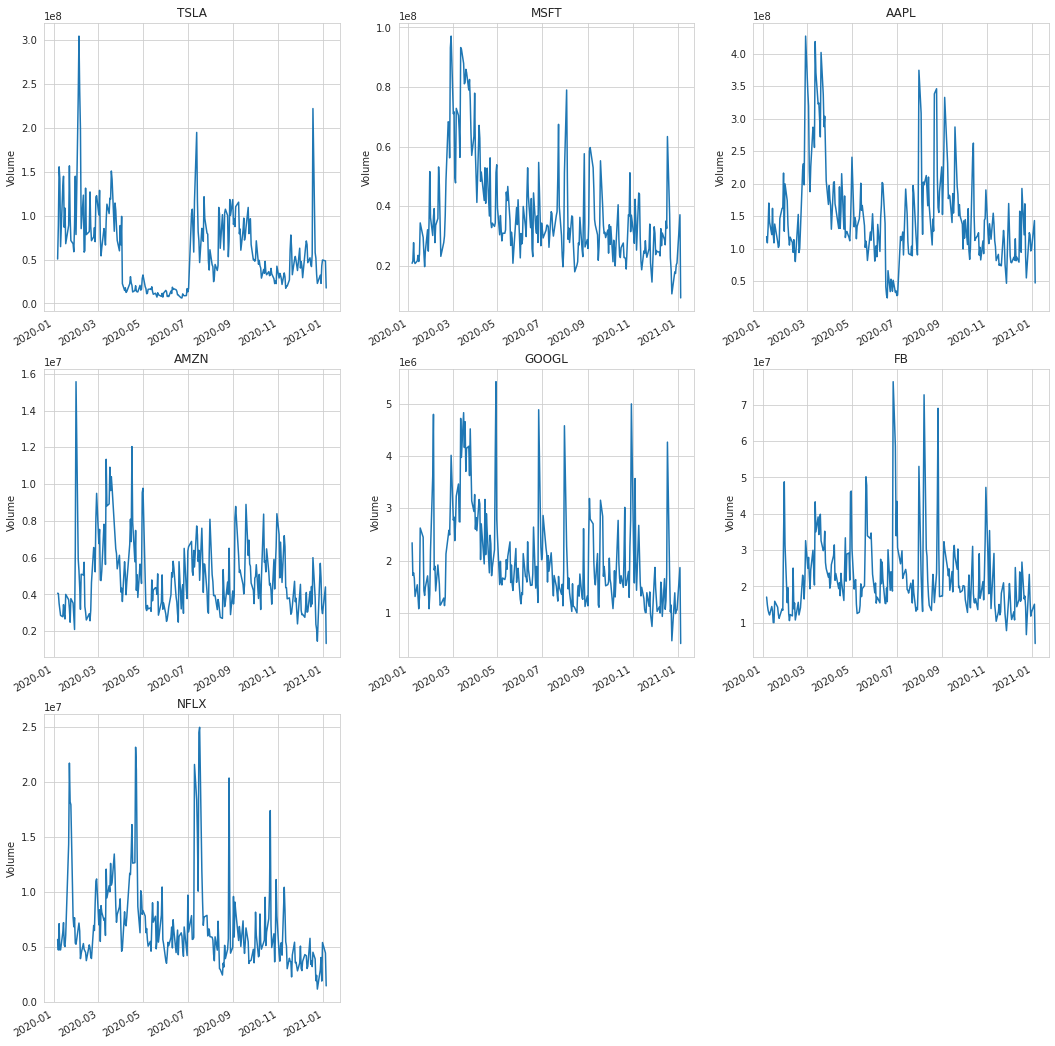

In [12]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(18, 8))
plt.subplots_adjust(top=1.9, bottom=1.8)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [13]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [14]:
TSLA.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2020-12-29,669.900024,655.000000,661.000000,665.989990,22910800.0,665.989990,TESLA,653.455005,632.678003,522.749800
2020-12-30,696.599976,668.359985,672.000000,694.780029,42846000.0,694.780029,TESLA,659.608008,638.179004,528.028801
2020-12-31,718.719971,691.119995,699.989990,705.669983,49570900.0,705.669983,TESLA,667.898004,645.021503,533.703401
2021-01-04,744.489990,717.190002,719.460022,729.770020,48533300.0,729.770020,TESLA,675.285004,651.841003,539.846001
2021-01-05,740.835022,719.200012,723.659973,736.604980,17664095.0,736.604980,TESLA,679.445502,658.719254,546.062300


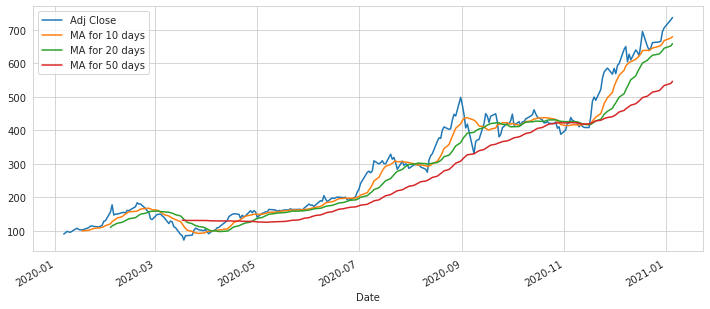

In [15]:
TSLA[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

Moving averages for more days have a upward plot, as they're less reliable on daily fluctuations. So even though, Tesla stock has a slight dip near the start of november, it's generally been on an upward trend since may and before covid.

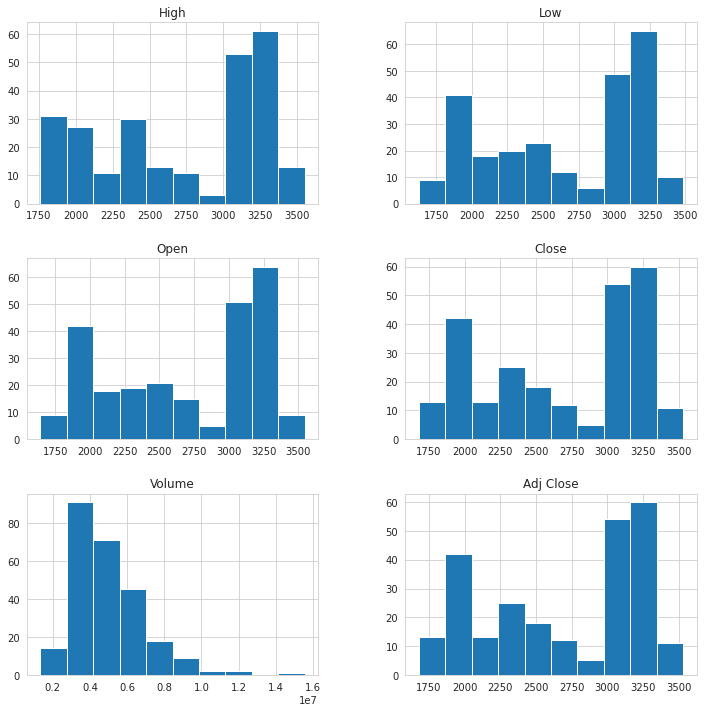

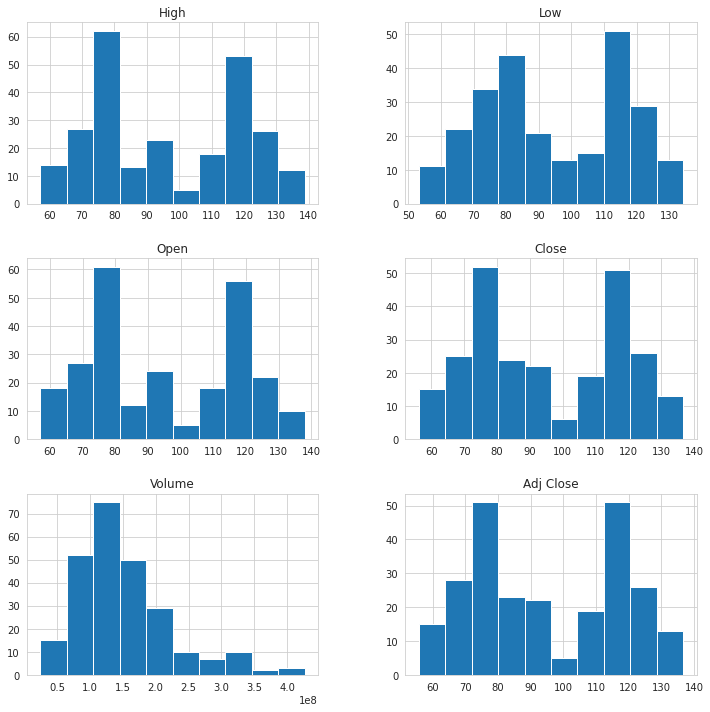

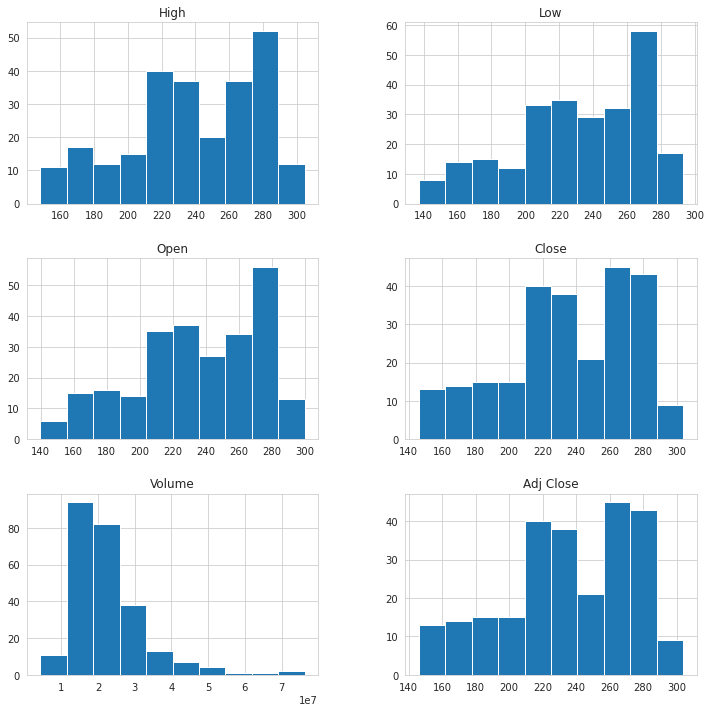

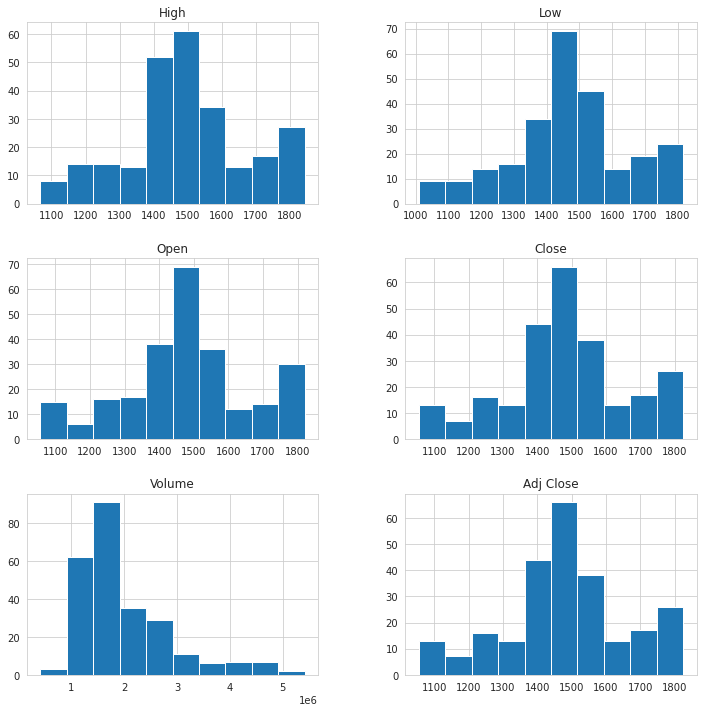

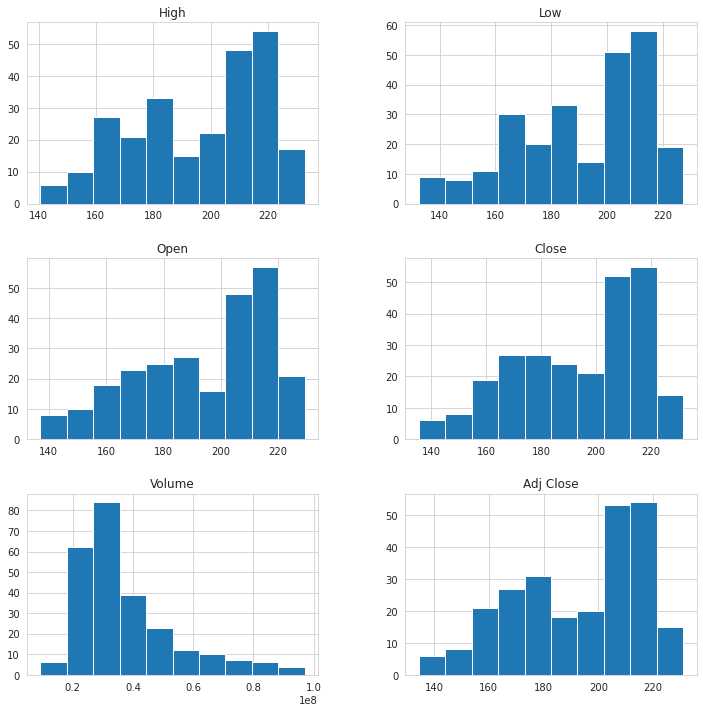

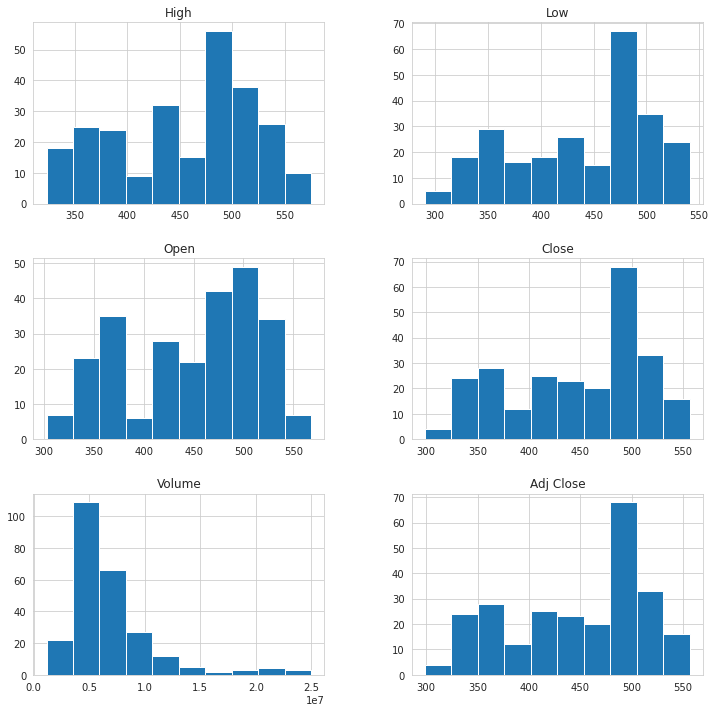

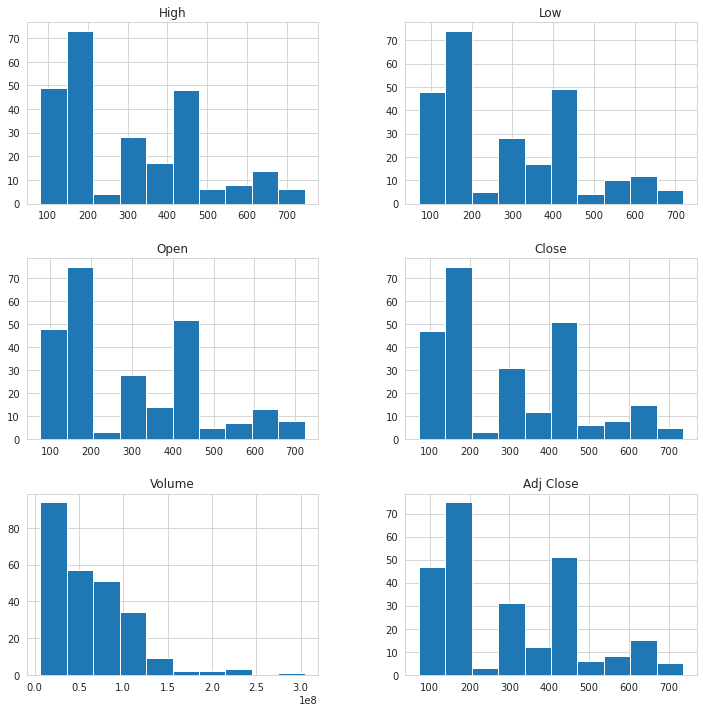

In [16]:
df.groupby("company_name").hist(figsize=(12, 12));

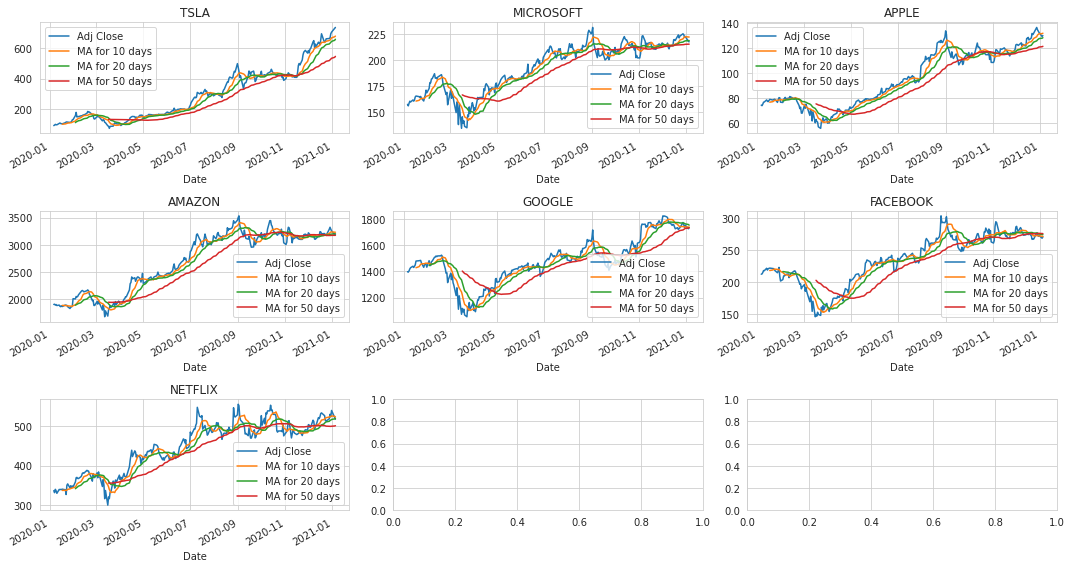

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TSLA')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MICROSOFT')

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,2])
axes[0,2].set_title('APPLE')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

GOOGL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('GOOGLE')

FB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,2])
axes[1,2].set_title('FACEBOOK')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('NETFLIX')

fig.tight_layout()

# What was the daily return average of a stock?

In [18]:
#The daily return column can be created by using the percentage change over the adjusted closing price
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

In [19]:
TSLA['Daily Return'].tail()

Date
2020-12-29    0.003465
2020-12-30    0.043229
2020-12-31    0.015674
2021-01-04    0.034152
2021-01-05    0.009366
Name: Daily Return, dtype: float64

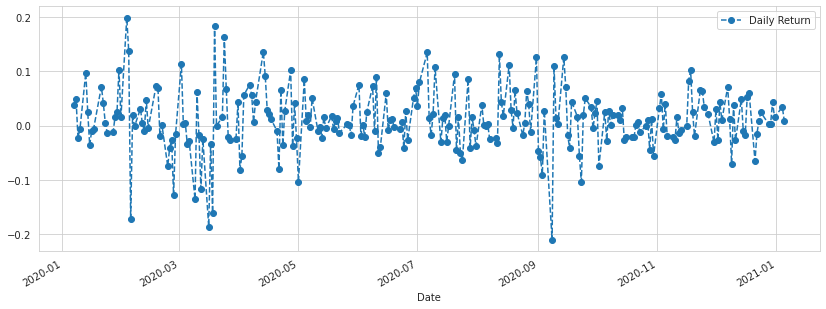

In [20]:
#Plotting the daily return
TSLA['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

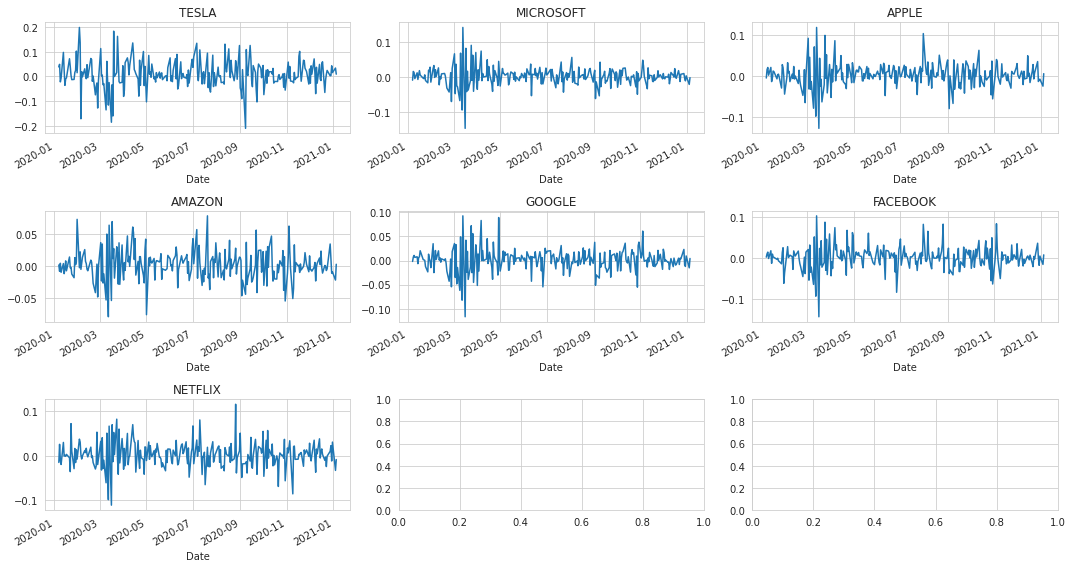

In [21]:
#Plotting daily % return graph
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0])
axes[0,0].set_title('TESLA')

MSFT['Daily Return'].plot(ax=axes[0,1])
axes[0,1].set_title('MICROSOFT')

AAPL['Daily Return'].plot(ax=axes[0,2])
axes[0,2].set_title('APPLE')

AMZN['Daily Return'].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

GOOGL['Daily Return'].plot(ax=axes[1,1])
axes[1,1].set_title('GOOGLE')

FB['Daily Return'].plot(ax=axes[1,2])
axes[1,2].set_title('FACEBOOK')

NFLX['Daily Return'].plot(ax=axes[2,0])
axes[2,0].set_title('NETFLIX')

fig.tight_layout()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

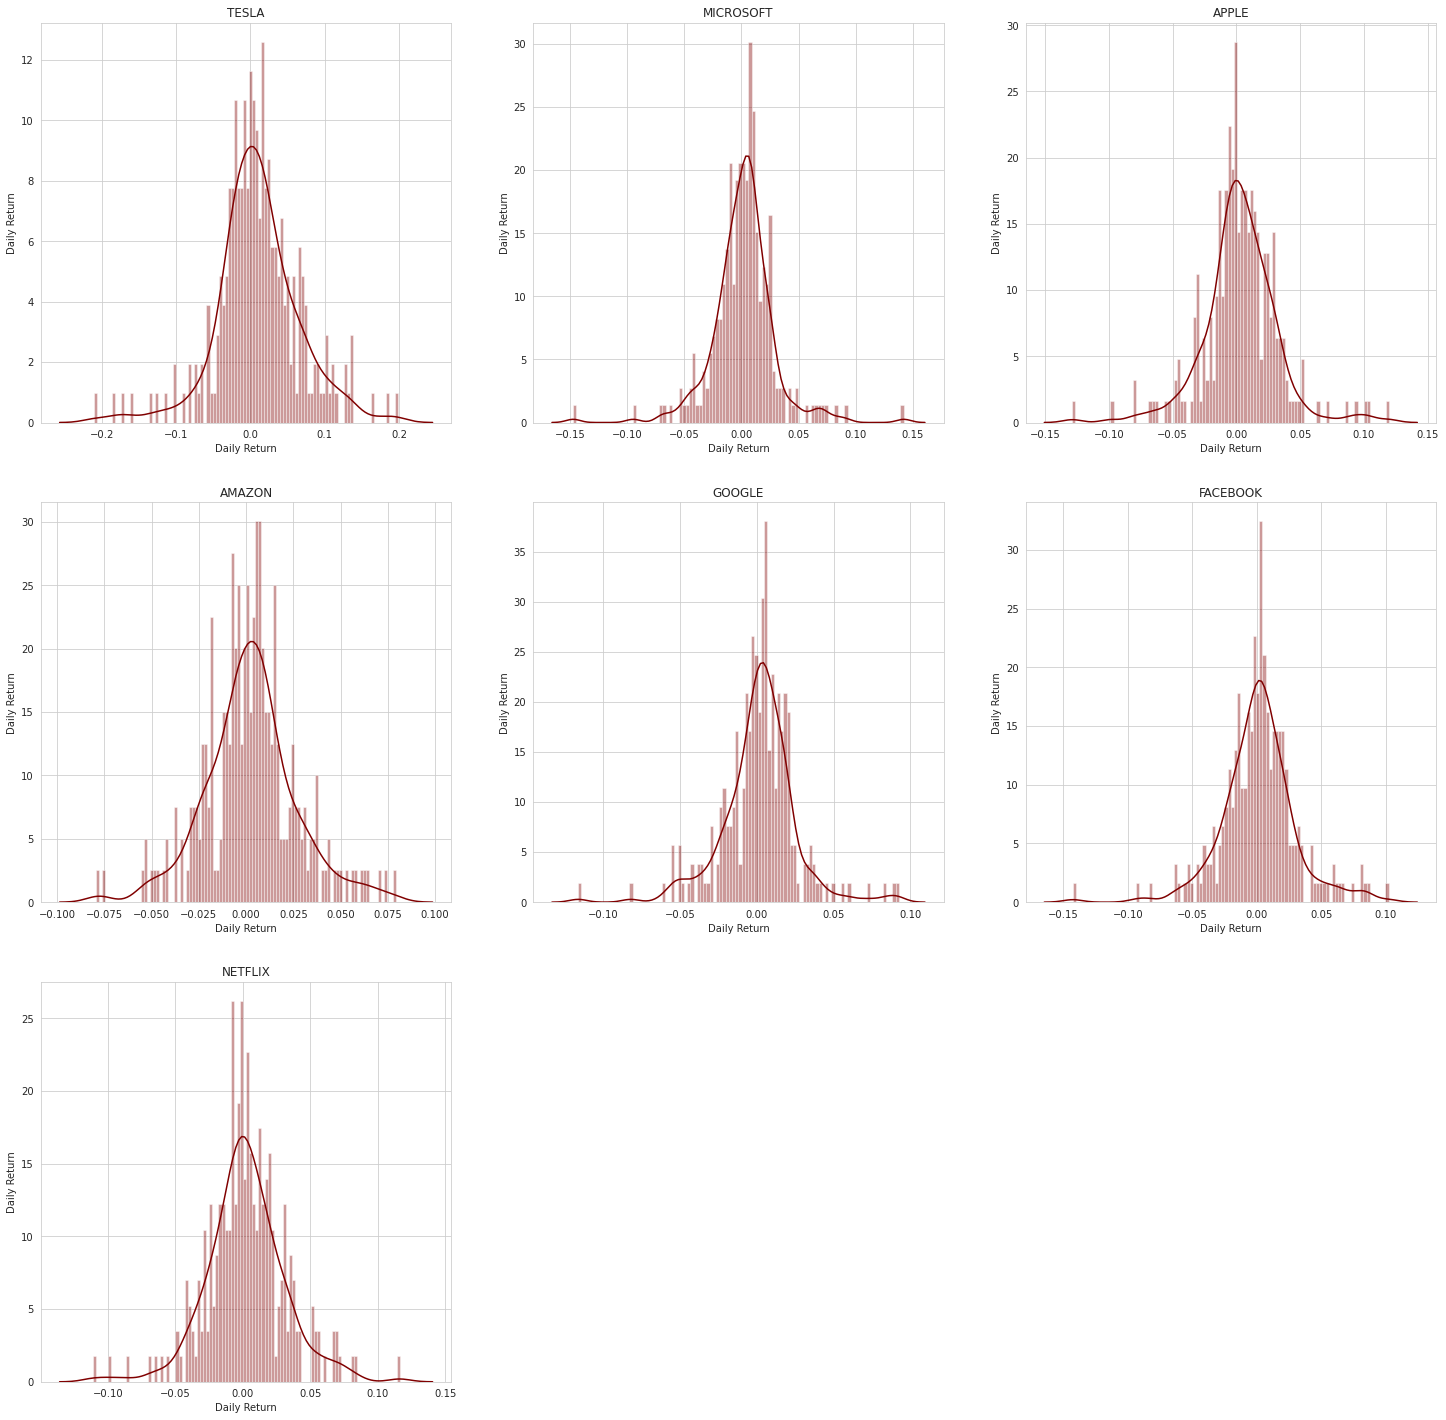

In [22]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(25, 25))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='maroon')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')


# What was the correlation between daily returns of different stocks?

In [23]:
#Reading just the 'Adj Close' column this time
close_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [24]:
close_df.tail()

Symbols,TSLA,MSFT,AAPL,AMZN,GOOGL,FB,NFLX
Date,,,,,,,
2020-12-29,665.989990,224.149994,134.869995,3322.000000,1757.760010,276.779999,530.869995
2020-12-30,694.780029,221.679993,133.720001,3285.850098,1736.250000,271.869995,524.590027
2020-12-31,705.669983,222.419998,132.690002,3256.929932,1752.640015,273.160004,540.729980
2021-01-04,729.770020,217.690002,129.410004,3186.629883,1726.130005,268.940002,522.859985
2021-01-05,736.655029,217.289993,130.175003,3196.895020,1732.969971,271.054993,518.390015


Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks

In [25]:
rets_df = close_df.pct_change()

rets_df.tail()

Symbols,TSLA,MSFT,AAPL,AMZN,GOOGL,FB,NFLX
Date,,,,,,,
2020-12-29,0.003465,-0.003601,-0.013315,0.011584,-0.009132,-0.000794,0.022634
2020-12-30,0.043229,-0.011019,-0.008527,-0.010882,-0.012237,-0.017740,-0.011830
2020-12-31,0.015674,0.003338,-0.007703,-0.008801,0.009440,0.004745,0.030767
2021-01-04,0.034152,-0.021266,-0.024719,-0.021585,-0.015126,-0.015449,-0.033048
2021-01-05,0.009434,-0.001838,0.005911,0.003221,0.003963,0.007864,-0.008549


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

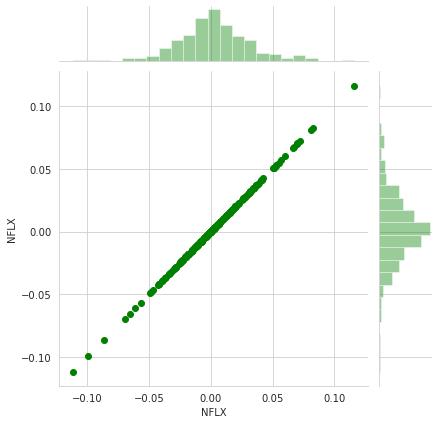

In [26]:
sns.jointplot('NFLX','NFLX',rets_df,kind='scatter',color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Netflix and Tesla daily returns.

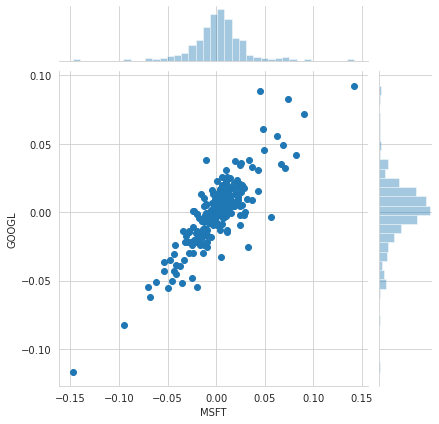

In [27]:
sns.jointplot('MSFT','GOOGL',rets_df,kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

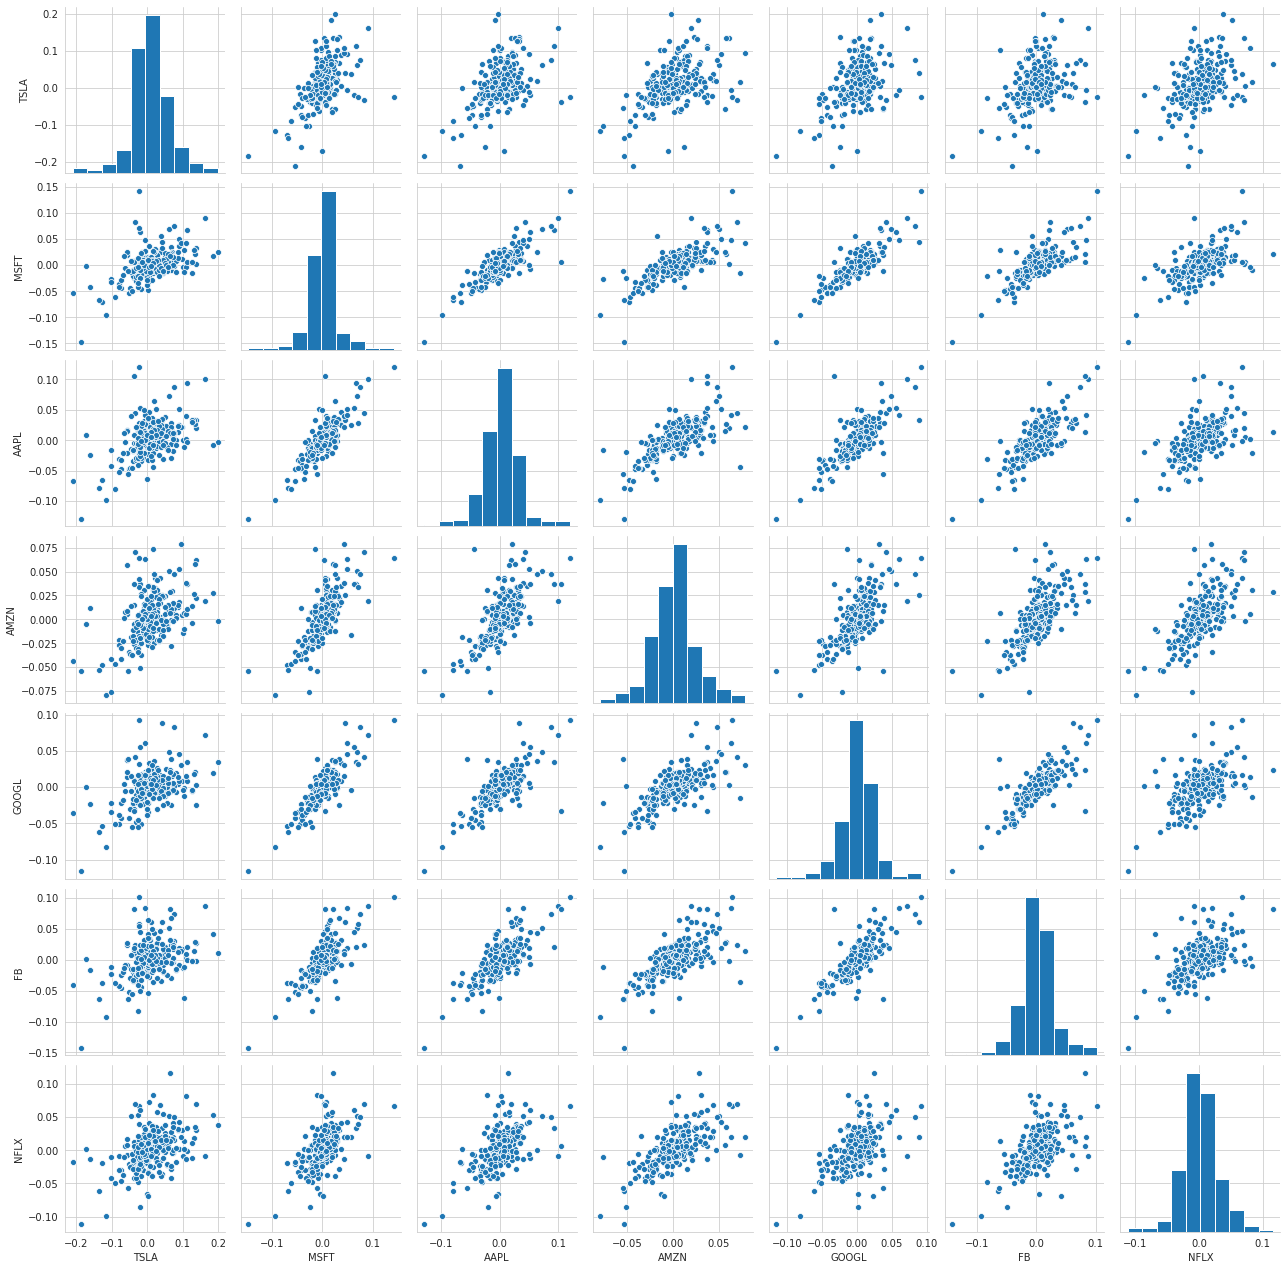

In [28]:
sns.pairplot(rets_df.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between MICROSOFT and APPLE daily returns. It might be interesting to investigate that individual comaprison. 

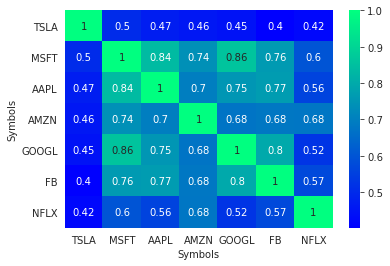

In [29]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(rets_df.corr(), annot=True, cmap='winter')

Microsoft&Google and Microsoft & Apple seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

# How much value do we put at risk by investing in a particular stock?

Apart from correlation, we also analyse each stock’s risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk).

In [30]:
rets = rets_df.dropna()

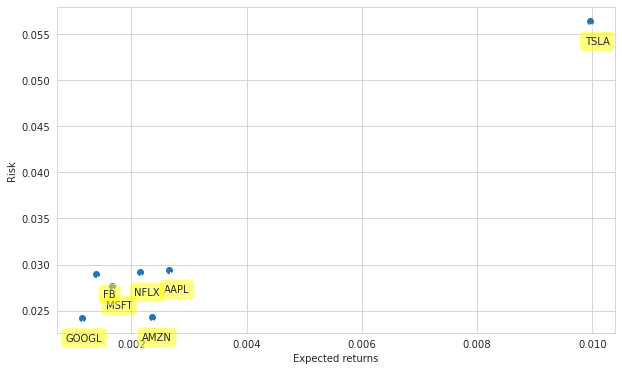

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20,-25),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Tesla share holder be like :- High Risk High Returns$

Now you could view this neat chart of risk and return comparisons for competing stocks. Logically, you would like to minimize the risk and maximize returns. Therefore, you would want to draw the line for your risk-return tolerance.This red line showcases your expected value threshold and your baseline for buy/sell decision.

**Value at Risk**
 
 We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

**Bootstrap Method**

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

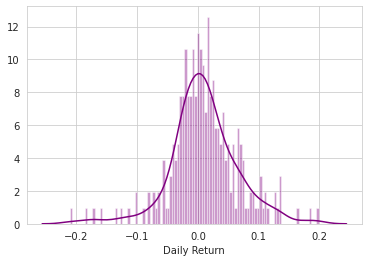

In [32]:
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')

In [33]:

rets.head()

Symbols,TSLA,MSFT,AAPL,AMZN,GOOGL,FB,NFLX
Date,,,,,,,
2020-01-07,0.038801,-0.009118,-0.004703,0.002092,-0.001932,0.002164,-0.015127
2020-01-08,0.049205,0.015928,0.016086,-0.007809,0.007118,0.010138,0.025729
2020-01-09,-0.021945,0.012493,0.021241,0.004799,0.010498,0.014311,-0.010611
2020-01-10,-0.006627,-0.004627,0.002261,-0.009411,0.006459,-0.001099,-0.019693
2020-01-13,0.097689,0.012024,0.021364,0.004323,0.007747,0.017656,0.029996


In [34]:
#Using Pandas built in qualtile method
rets['TSLA'].quantile(0.05)

-0.07415255090428738

The 0.05 empirical quantile of daily returns is at -0.049. This means that with 95% confidence, the worst daily loss will not exceed 7.41% (of the investment).

# How can we attempt to predict future stock behaviour?

We will use these four machine learning models to predict our stocks: Simple Linear Analysis, Quadratic Discriminant Analysis (QDA),K Nearest Neighbor(KNN) and last  Monte Carlo Method.

But first, let us engineer some features: High Low Percentage and Percentage Change

In [35]:
dfreg = df.loc[:,['Adj Close' ,'Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = ((df['Close'] - df['Open']) / df['Open'] * 100.0)
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2020-01-06,90.307999,50665000.0,2.560124,2.513221
2020-01-07,93.811996,89410500.0,3.895024,1.660162
2020-01-08,98.428001,155721500.0,6.148651,3.892763
2020-01-09,96.267998,142202000.0,5.387049,-3.170389
2020-01-10,95.629997,64797500.0,2.350728,-0.755520


**Model Generation**
* To predict the return of the stocks in the next period - Prediction analysis
* Monte Carlo Method

**Build the model**

**Monte Carlo Method**
* Check out this [link](https://www.investopedia.com/articles/07/montecarlo.asp) for more info on the Monte Carlo method. In short: in this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.

In [36]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['TSLA']

sigma = rets.std()['TSLA']

In [37]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [38]:
TSLA.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,,
2020-12-29,669.900024,655.000000,661.000000,665.989990,22910800.0,665.989990,TESLA,653.455005,632.678003,522.749800,0.003465
2020-12-30,696.599976,668.359985,672.000000,694.780029,42846000.0,694.780029,TESLA,659.608008,638.179004,528.028801,0.043229
2020-12-31,718.719971,691.119995,699.989990,705.669983,49570900.0,705.669983,TESLA,667.898004,645.021503,533.703401,0.015674
2021-01-04,744.489990,717.190002,719.460022,729.770020,48533300.0,729.770020,TESLA,675.285004,651.841003,539.846001,0.034152
2021-01-05,740.835022,719.200012,723.659973,736.604980,17664095.0,736.604980,TESLA,679.445502,658.719254,546.062300,0.009366


Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Tesla')

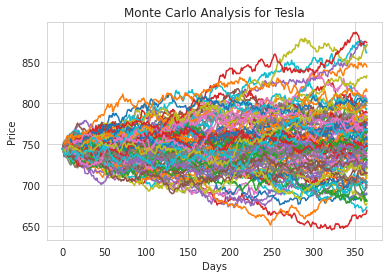

In [39]:
start_price = 744.489929 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Tesla')

In [40]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for TESLA Stock after 365 days')

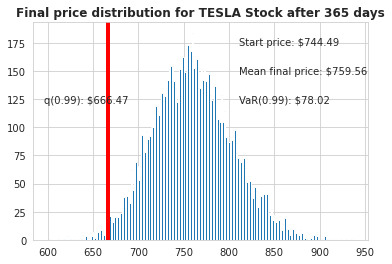

In [41]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for TESLA Stock after %s days" %days, weight='bold')

We can infer from this that, Tesla stock trend is upward since last year . The starting price that we had was USD744.489929, and the average final price over 10,000 runs was USD759.54.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD80.75, 99% of the time.